# Stock Market Prediction Analysis

Basic data analysis for MLOps project to predict DJIA index movement based on news.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Loading and Preparation

Let's load the dataset with news and stock prices, and check its structure.

In [2]:
# Load data
data = pd.read_csv('../data/raw/Combined_News_DJIA.csv')

# Basic dataset information
print("Dataset size:", data.shape)
print("\nFirst few rows:")
display(data.head())
print("\nColumn information:")
display(data.info())

Dataset size: (1989, 27)

First few rows:


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 


Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top

None

## 2. Basic Data Analysis

Let's check class distribution and missing values.

Class distribution:
Label
1    0.535445
0    0.464555
Name: proportion, dtype: float64

Missing values:
Top23    1
Top24    3
Top25    3
dtype: int64


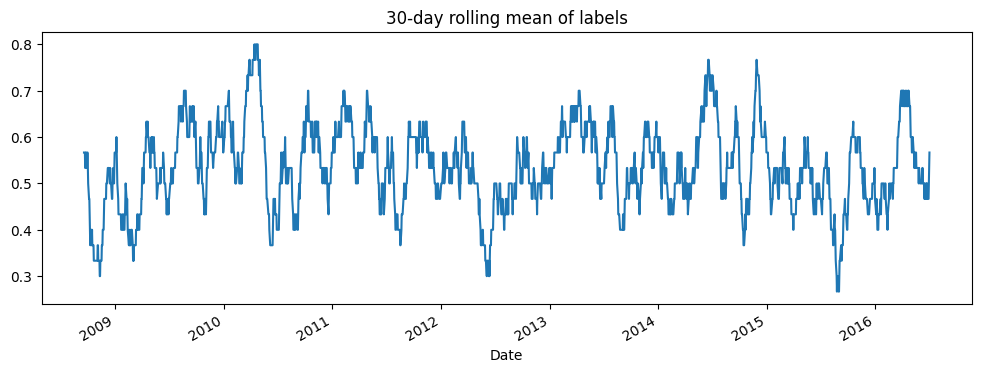

In [3]:
# Class distribution
print("Class distribution:")
print(data['Label'].value_counts(normalize=True))

# Check for missing values
print("\nMissing values:")
missing = data.isnull().sum()
print(missing[missing > 0])

# Plot label distribution over time
plt.figure(figsize=(12, 4))
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date')['Label'].rolling(30).mean().plot()
plt.title('30-day rolling mean of labels')
plt.show()

## 3. Data Transformation and Model Training

Transform data to "tall" format and train baseline model.

In [4]:
# Shift the label 2 days forward (predict the day after tomorrow)
data['Label'] = data['Label'].shift(-3)

# Add historical features (rolling means)
data = data.copy()
rolling_windows = [1, 2, 3, 5, 7, 15]
for window in rolling_windows:
    # Use only past data for calculating rolling means
    # Consider that we're predicting 2 days ahead
    data[f'rolling_mean_{window}d'] = data['Label'].shift(3).rolling(window=window).mean()

# Remove first 15 rows (NaN due to max rolling window) and last 4 rows (NaN due to target shift by 2 days)
data = data.iloc[15:-3].reset_index(drop=True)

# Add custom text preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')

def custom_analyzer(text):
    tokens = tokenizer.tokenize(text)
    tokens = [w.lower() for w in tokens if w.lower() not in stop_words]
    tokens = [stemmer.stem(w) for w in tokens]
    # Add bigrams to unigrams
    unigrams = tokens
    bigrams = [unigrams[i] + '_' + unigrams[i+1] for i in range(len(unigrams)-1)]
    return unigrams + bigrams

def transform_to_tall_format(df):
    tall_data = []
    for idx, row in df.iterrows():
        date = row['Date']
        label = row['Label']
        # Get all rolling means for current date
        rolling_features = {f'rolling_mean_{w}d': row[f'rolling_mean_{w}d'] for w in rolling_windows}
        
        # Use all 25 headlines
        for i in range(1, 26):
            headline = row[f'Top{i}']
            if isinstance(headline, str) and not pd.isna(headline):
                # Add rolling means to each record
                tall_data.append({
                    'Date': date,
                    'Headline': headline,
                    'Label': label,
                    **rolling_features  # unpack dictionary with rolling means
                })
    return pd.DataFrame(tall_data)

# Data transformation
tall_df = transform_to_tall_format(data)
print("Data size in tall format:", tall_df.shape)
print("\nExample row with rolling means:")
display(tall_df.iloc[0])

# Check if there are NaN values in target
print("\nChecking for NaN in target:")
print(f"Number of NaN in Label: {tall_df['Label'].isna().sum()}")

# Remove rows with NaN in target if any
tall_df = tall_df.dropna(subset=['Label'])

# Split into train/test by date
train = tall_df[pd.to_datetime(tall_df['Date']) <= '2014-12-31']
test = tall_df[pd.to_datetime(tall_df['Date']) > '2014-12-31']

# Calculate class weights for balancing
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(train['Label']), 
                                   y=train['Label'])
class_weight_dict = dict(zip(np.unique(train['Label']), class_weights))
print("\nClass weights:", class_weight_dict)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create pipeline for text data with custom preprocessing
text_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        max_features=800,
        ngram_range=(1, 2),
        analyzer=custom_analyzer
    )),
    ('tfidf', TfidfTransformer())
])

# Create full pipeline with text and numeric feature processing
full_pipeline = ColumnTransformer([
    ('text', text_pipeline, 'Headline'),
    ('numeric', 'passthrough', [f'rolling_mean_{w}d' for w in rolling_windows])
])

# Final pipeline with class balancing
pipeline = Pipeline([
    ('features', full_pipeline),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        max_depth=6,
        n_estimators=100,
        learning_rate=0.1,
        scale_pos_weight=class_weights[1]/class_weights[0]  # Balancing through weights
    ))
])

# Training
pipeline.fit(train, train['Label'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data size in tall format: (49268, 9)

Example row with rolling means:


Date                                              2008-08-29 00:00:00
Headline            b'Russian Prime Minister Vladimir Putin has ac...
Label                                                             0.0
rolling_mean_1d                                                   0.0
rolling_mean_2d                                                   0.5
rolling_mean_3d                                              0.666667
rolling_mean_5d                                                   0.6
rolling_mean_7d                                              0.714286
rolling_mean_15d                                                  NaN
Name: 0, dtype: object


Checking for NaN in target:
Number of NaN in Label: 0

Class weights: {0.0: 1.0899726775956284, 1.0: 0.9237484369934701}


c:\Users\Gleb\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:537: UserWarning: The parameter 'ngram_range' will not be used since 'analyzer' is callable'
  warnings.warn(


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  Pipeline(steps=[('vectorizer',
                                                                   CountVectorizer(analyzer=<function custom_analyzer at 0x000002933754DD00>,
                                                                                   max_features=800,
                                                                                   ngram_range=(1,
                                                                                                2))),
                                                                  ('tfidf',
                                                                   TfidfTransformer())]),
                                                  'Headline'),
                                                 ('numeric', 'passthrough',
                                                  ['rolling_mean_1d',
                                                   'rolling_mean_2d',
                                                   'rolling_mean_3d',
                                                   'rolling_mean_5d',
                                                   'ro...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

## 4. Model Evaluation and Threshold Setting for Monitoring

Let's calculate key metrics and define threshold values for monitoring system.

Metrics on test set:
Accuracy: 0.5116
F1-score: 0.5400
AUC-ROC: 0.5062


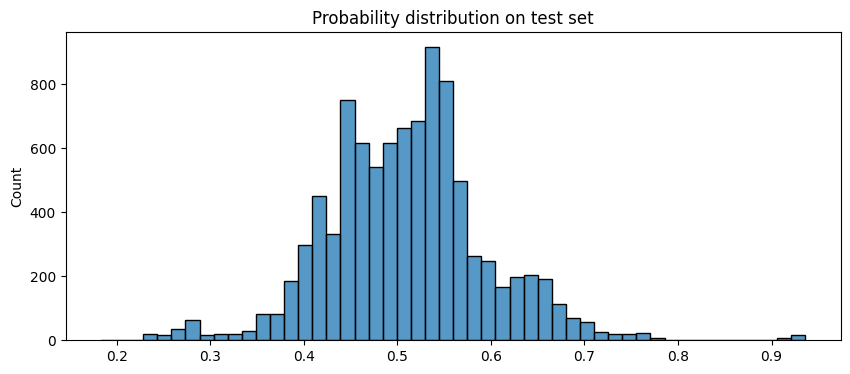


Top-20 important features:
              feature  importance
804   rolling_mean_7d    0.011241
802   rolling_mean_3d    0.010001
801   rolling_mean_2d    0.009805
805  rolling_mean_15d    0.008972
749            ukrain    0.008683
803   rolling_mean_5d    0.007779
800   rolling_mean_1d    0.007609
235             ebola    0.006866
608            releas    0.006678
244             elect    0.005535
87                  b    0.005500
164           collaps    0.005442
510           nuclear    0.005331
288            flight    0.005177
627              rule    0.005079
795             would    0.005051
243          egyptian    0.005002
60           american    0.004905
233         earthquak    0.004777
780              well    0.004703

Rolling means importance:
              feature  importance
804   rolling_mean_7d    0.011241
802   rolling_mean_3d    0.010001
801   rolling_mean_2d    0.009805
805  rolling_mean_15d    0.008972
803   rolling_mean_5d    0.007779
800   rolling_mean_1d    0.

In [5]:
# Predictions on test set
test_preds = pipeline.predict(test)
test_probs = pipeline.predict_proba(test)[:, 1]

# Calculate metrics
print("Metrics on test set:")
print(f"Accuracy: {accuracy_score(test['Label'], test_preds):.4f}")
print(f"F1-score: {f1_score(test['Label'], test_preds):.4f}")
print(f"AUC-ROC: {roc_auc_score(test['Label'], test_probs):.4f}")

# Plot probability distribution
plt.figure(figsize=(10, 4))
sns.histplot(test_probs, bins=50)
plt.title('Probability distribution on test set')
plt.show()

# Feature importance analysis
if hasattr(pipeline.named_steps['classifier'], 'feature_importances_'):
    # Get names of all features
    text_feature_names = pipeline.named_steps['features'].named_transformers_['text'].named_steps['vectorizer'].get_feature_names_out()
    numeric_feature_names = [f'rolling_mean_{w}d' for w in rolling_windows]
    all_feature_names = list(text_feature_names) + numeric_feature_names
    
    # Create DataFrame with feature importance
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': pipeline.named_steps['classifier'].feature_importances_
    })
    
    # Sort and show top-20 important features
    top_features = feature_importance.sort_values('importance', ascending=False).head(20)
    print("\nTop-20 important features:")
    print(top_features)
    
    # Analyze rolling means importance separately
    rolling_importance = feature_importance[feature_importance['feature'].isin(numeric_feature_names)]
    print("\nRolling means importance:")
    print(rolling_importance.sort_values('importance', ascending=False))

=== Metrics on test set (daily aggregation) ===

--- 1. Probability averaging ---
Accuracy: 0.4853
F1-score: 0.5211
AUC-ROC:  0.5102

--- 2. Majority voting ---
Accuracy: 0.5147
F1-score: 0.5404

--- 3. Maximum probability ---
Accuracy: 0.5280
F1-score: 0.6590
AUC-ROC:  0.5122

Classification report (probability averaging):
              precision    recall  f1-score   support

         0.0       0.47      0.42      0.44       184
         1.0       0.50      0.55      0.52       191

    accuracy                           0.49       375
   macro avg       0.48      0.48      0.48       375
weighted avg       0.48      0.49      0.48       375



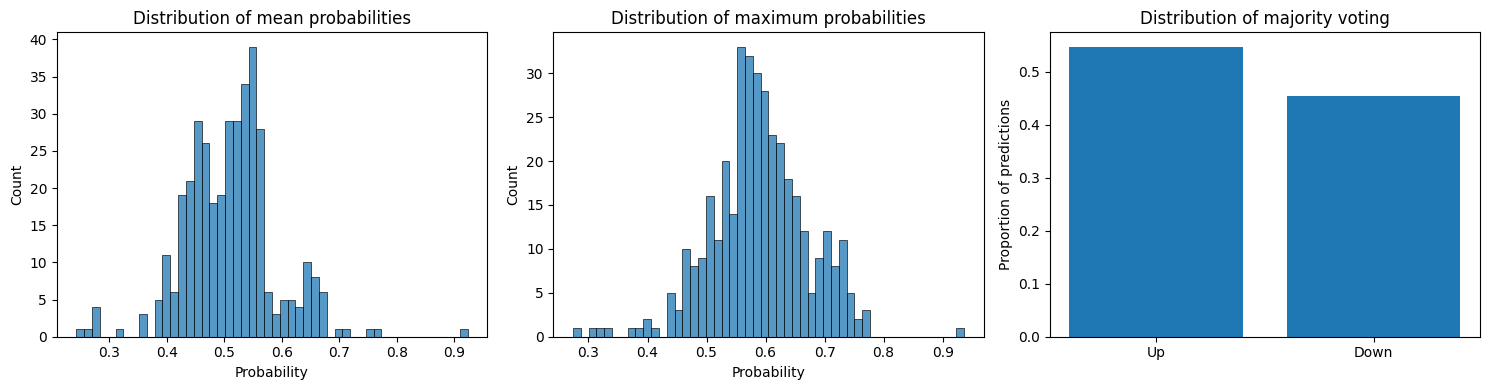

In [6]:
# Aggregation of predictions by days
from sklearn.metrics import classification_report


test_dates = test['Date'].values
unique_test_dates = np.unique(test_dates)

# Prepare arrays for different aggregation methods
final_probs_mean = []  # probability averaging
final_preds_mean = []
final_preds_majority = []  # majority voting
final_probs_max = []  # maximum probability
final_preds_max = []
final_labels = []

# Aggregate predictions for each day
for date in unique_test_dates:
    date_mask = test_dates == date
    date_probs = test_probs[date_mask]
    date_preds = test_preds[date_mask]
    date_labels = test['Label'][date_mask].values
    
    # 1. Probability averaging
    avg_prob = np.mean(date_probs)
    pred_mean = 1 if avg_prob > 0.5 else 0
    final_probs_mean.append(avg_prob)
    final_preds_mean.append(pred_mean)
    
    # 2. Majority voting
    pred_majority = 1 if np.sum(date_preds) >= len(date_preds)/2 else 0
    final_preds_majority.append(pred_majority)
    
    # 3. Maximum probability
    max_prob = np.max(date_probs)
    pred_max = 1 if max_prob > 0.5 else 0
    final_probs_max.append(max_prob)
    final_preds_max.append(pred_max)
    
    # Label (all the same for one day)
    final_labels.append(date_labels[0])

final_labels = np.array(final_labels)
final_probs_mean = np.array(final_probs_mean)
final_preds_mean = np.array(final_preds_mean)
final_preds_majority = np.array(final_preds_majority)
final_probs_max = np.array(final_probs_max)
final_preds_max = np.array(final_preds_max)

print("=== Metrics on test set (daily aggregation) ===")
print("\n--- 1. Probability averaging ---")
print(f"Accuracy: {accuracy_score(final_labels, final_preds_mean):.4f}")
print(f"F1-score: {f1_score(final_labels, final_preds_mean):.4f}")
print(f"AUC-ROC:  {roc_auc_score(final_labels, final_probs_mean):.4f}")

print("\n--- 2. Majority voting ---")
print(f"Accuracy: {accuracy_score(final_labels, final_preds_majority):.4f}")
print(f"F1-score: {f1_score(final_labels, final_preds_majority):.4f}")

print("\n--- 3. Maximum probability ---")
print(f"Accuracy: {accuracy_score(final_labels, final_preds_max):.4f}")
print(f"F1-score: {f1_score(final_labels, final_preds_max):.4f}")
print(f"AUC-ROC:  {roc_auc_score(final_labels, final_probs_max):.4f}")

print("\nClassification report (probability averaging):")
print(classification_report(final_labels, final_preds_mean))

# Plot distribution of aggregated probabilities
plt.figure(figsize=(15, 4))

plt.subplot(131)
sns.histplot(final_probs_mean, bins=50)
plt.title('Distribution of mean probabilities')
plt.xlabel('Probability')

plt.subplot(132)
sns.histplot(final_probs_max, bins=50)
plt.title('Distribution of maximum probabilities')
plt.xlabel('Probability')

plt.subplot(133)
x_pos = ['Up', 'Down']
heights = [np.mean(final_preds_majority == 1), np.mean(final_preds_majority == 0)]
plt.bar(x_pos, heights)
plt.title('Distribution of majority voting')
plt.ylabel('Proportion of predictions')

plt.tight_layout()
plt.show()

## Conclusions

1. Data is balanced: approximately equal number of up and down days
2. Conversion to "tall" format works correctly (all 25 headlines are used)
3. Historical features added (rolling means for 1,2,3,5,7,15 days)
4. Baseline model uses:
   - target shifted 2 days forward
   - text features (TF-IDF)
   - historical features (rolling means)
5. Thresholds set for monitoring alerts:
   - AUC-ROC < 0.5 (worse than random guessing)
   - F1-score < 0.5 (worse than baseline)

These results will be used for setting up Prefect pipelines and monitoring in Evidently/Grafana.